In [1]:
import numpy as np
import pandas as pd 


## Gradient descent $ w_{i+1} = w_i - \alpha * \nabla L (w_i)$ , This is y_hat, which is our array for predictions $ \hat{y} $ = y_pred 


In [4]:
class LogisticSigmoid:
    def __init__(self,input_dim, alpha = 0.001): # alpha is the learnign rate 
        self.w = np.zeros((input_dim, 1))
        self.b = 0 
        self.alpha = alpha 
    
    ## changed sigmoid name to activation, because we are in a neural network architecture style 

    def activation(self, z):
        sigm = 1/(1+np.exp(-z))
        return sigm
    
    def forward(self,X):
        hyperplane = np.dot(X, self.w) + self.b
        return self.activation(hyperplane)
     
    
    def backward(self, X, y, y_hat):
        m = X.shape[0]
        # using chain rule we compute dl/dw = partial derivative with respect to w , dl/db = partial derivative with respedt to vbias 
        dz = y_hat - y  
        print((X).shape, dz.shape)
        dw = 1/m * np.dot(X.T, dz)
        db = 1/m * np.sum(dz)  
        return dw, db
    
    def bce(self, y, y_hat):
        m = y.shape[0]
        L = -1/m * np.sum(y*np.log(y_hat) + (1-y) * (np.log(1-y_hat)))
        return L

    def fit(self, X, y, epochs = 1000):
        ## gradient descent 
        ##  noyt STOCHASTIC GRADIENT DESCENT yet

        for i in range(epochs):
            prob = self.forward(X)
            loss = self.bce(y, prob)
            dw, db = self.backward(X, y, prob)
            self.w = self.w - self.alpha * dw 
            self.b = self.b - self.alpha * db 
            
            if i%50:
                print(f"Epoch {i}: loss = {loss}")
    
        

    def predict(self, x):
        probability = self.forward(x)  
        y_hat = [] 
        for p in probability:
            if p > 0.5:
                y_hat.append(1)
            else:
                y_hat.append(0)
        
            
        return np.array(y_hat)




In [5]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_classification  

# artificial dataset 
                                                                                                                    ## seeding 
X, y = make_classification(n_samples = 100, n_features = 2, n_redundant=0, n_informative=2, n_clusters_per_class=1, random_state=0)

y = y.reshape(-1,1)
input_dim = X.shape[1]
model = LogisticSigmoid(input_dim)

model.fit(X,y)





(100, 2) (100, 1)
(100, 2) (100, 1)
Epoch 1: loss = 0.6929134142398184
(100, 2) (100, 1)
Epoch 2: loss = 0.6926798260510458
(100, 2) (100, 1)
Epoch 3: loss = 0.6924464158456591
(100, 2) (100, 1)
Epoch 4: loss = 0.6922131834757448
(100, 2) (100, 1)
Epoch 5: loss = 0.6919801287934434
(100, 2) (100, 1)
Epoch 6: loss = 0.6917472516509497
(100, 2) (100, 1)
Epoch 7: loss = 0.6915145519005134
(100, 2) (100, 1)
Epoch 8: loss = 0.6912820293944407
(100, 2) (100, 1)
Epoch 9: loss = 0.6910496839850909
(100, 2) (100, 1)
Epoch 10: loss = 0.6908175155248815
(100, 2) (100, 1)
Epoch 11: loss = 0.6905855238662844
(100, 2) (100, 1)
Epoch 12: loss = 0.6903537088618279
(100, 2) (100, 1)
Epoch 13: loss = 0.6901220703640972
(100, 2) (100, 1)
Epoch 14: loss = 0.6898906082257342
(100, 2) (100, 1)
Epoch 15: loss = 0.6896593222994376
(100, 2) (100, 1)
Epoch 16: loss = 0.6894282124379636
(100, 2) (100, 1)
Epoch 17: loss = 0.6891972784941254
(100, 2) (100, 1)
Epoch 18: loss = 0.6889665203207952
(100, 2) (100, 1)
E

In [6]:
h = model.predict(X)

In [7]:
h.shape , y.shape

((100,), (100, 1))

In [8]:
h

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1])

In [9]:
y = y.flatten()
y

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1])

In [10]:

weights = model.w 
bias = model.b 
print(f"bias {bias}, weights {weights}")



bias 0.0006710175276856012, weights [[-0.01295745]
 [ 0.40496916]]


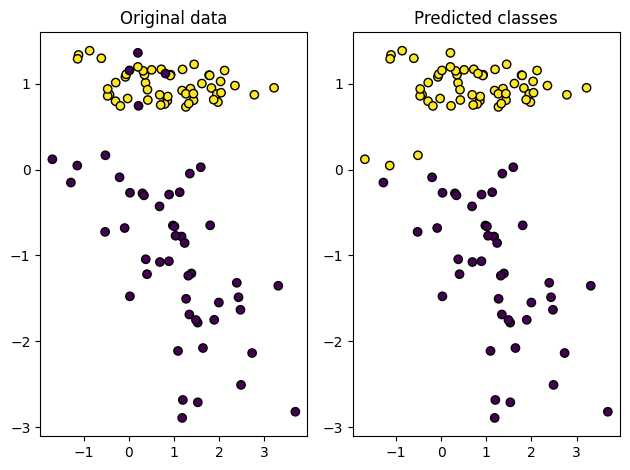

In [11]:
plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], c = y, cmap = "viridis", edgecolors='k')
plt.title("Original data")

plt.subplot(1,2,2)
plt.scatter(X[:,0], X[:,1], c = h, cmap = "viridis", edgecolors='k')
plt.title("Predicted classes")

plt.tight_layout()
plt.show() 


In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(y, h)
conf_matrix = confusion_matrix(y, h)
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.93
Confusion Matrix:
 [[43  7]
 [ 0 50]]


In [14]:
fp = (43 + 50) / (43 + 50 + 0 + 7)
print(fp)

0.93


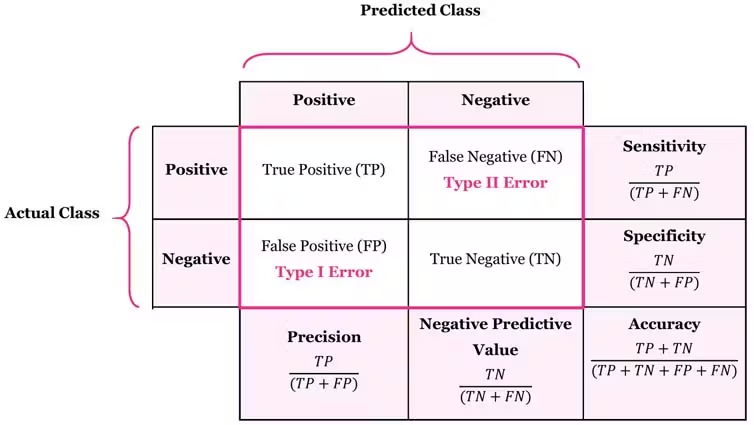